# 0.Introduction





Nhóm 31
*   21110388-Phạm Tấn Tài
* 21110386-Nguyễn Tấn Tài
* 21110382-Phan Văn Sinh









Chủ đề Data Science in Marketing
* Link dataset:https://www.kaggle.com/datasets/dsfelix/us-stores-sales
* Phân tích, trực quan hoá số liệu liên quan đến chiến dịch marketing
* Kiểm thử các kết quả số liệu thực tế so với số liệu đã đề ra
* Đưa ra mô hình học máy phân loại

#1.Data Preparartion

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
file=files.upload()

Saving sales.csv to sales.csv


* Area Code: Mã cửa hàng;
* State: Trạng thái của cửa hàng;
* Market: Khu vực cửa hàng;

*   Market Size: Kích thước của cửa hàng;

*   Profit: Lợi nhuận tính bằng đô la($)

*  Margin: Lợi nhuận + Tổng chi phí HOẶC Doanh thu - Giá vốn hàng bán ($)

*   Sales: Giá trị thu được từ việc bán hàng($)


*   COGS: Giá vốn hàng bán($)


*   Total Expenses: Tổng chi phí để bán được sản phẩm($)


*   Marketing: Chi phí tiếp thị($)

* Inventory: Giá trị tồn kho tại thời điểm hiện tại($)


*   Budget Profit: Lợi nhuận dự kiến($)

*   Budget COGS: Giá vốn hàng bán dự kiến($)


*   Budget Margin: Lợi nhuận dự kiến +Tổng chi phí dự kiến hoặc Doanh thu dự kiến- Giá vốn bán hàng dự kiến($)

*   Budget Sales: Giá trị dự kiến thu được từ doanh số bán hàng($)
*   ProductID: ID sản phẩm;
* Date: Ngày bán;
* Product Type: Danh mục sản phẩm;
* Product: Mô tả Sản phẩm;
* Type: Kiểu;


































In [ ]:
df=pd.read_csv('sales.csv')
df

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,04/01/10 00:00:00,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/10 00:00:00,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,11/01/10 00:00:00,Coffee,Columbian,Regular
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,12/01/10 00:00:00,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/11 00:00:00,Coffee,Columbian,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,985,Louisiana,South,Small Market,-6.0,66.0,113.0,47.0,72.0,42.0,-395.0,0.0,40.0,50.0,90.0,4,07/01/10 00:00:00,Espresso,Caffe Latte,Regular
4244,985,Louisiana,South,Small Market,-7.0,61.0,105.0,44.0,68.0,39.0,-508.0,10.0,30.0,60.0,90.0,4,08/01/10 00:00:00,Espresso,Caffe Latte,Regular
4245,985,Louisiana,South,Small Market,-3.0,76.0,131.0,55.0,79.0,49.0,-1053.0,0.0,40.0,60.0,100.0,4,12/01/10 00:00:00,Espresso,Caffe Latte,Regular
4246,985,Louisiana,South,Small Market,1.0,87.0,160.0,63.0,86.0,57.0,37.0,0.0,50.0,70.0,120.0,4,04/01/11 00:00:00,Espresso,Caffe Latte,Regular


Nhận xét: Bảng gồm 3 kiểu dữ liệu là dữ liệu số, ký tự và ngày tháng

Lưu ý Clean Data:
+ Kiểm tra, xử lý dữ liệu nhiễu: xử lý các giá trị không phù hợp có thể xóa, chỉnh sửa, thay thế
+ Kiểm tra Định dạng Dữ liệu: xem các định dạng dữ liệu các cột đã phù hợp chưa
+ Kiểm tra và Xử lý Trùng Lặp:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area Code       4248 non-null   int64  
 1   State           4248 non-null   object 
 2   Market          4248 non-null   object 
 3   Market Size     4248 non-null   object 
 4   Profit          4248 non-null   float64
 5   Margin          4248 non-null   float64
 6   Sales           4248 non-null   float64
 7   COGS            4248 non-null   float64
 8   Total Expenses  4248 non-null   float64
 9   Marketing       4248 non-null   float64
 10  Inventory       4248 non-null   float64
 11  Budget Profit   4248 non-null   float64
 12  Budget COGS     4248 non-null   float64
 13  Budget Margin   4248 non-null   float64
 14  Budget Sales    4248 non-null   float64
 15  ProductId       4248 non-null   int64  
 16  Date            4248 non-null   object 
 17  Product Type    4248 non-null   o

Ta thấy cột Date có định dạng object chưa phù hợp nên tiến hành thay đổi định dạng cột Data thành kiểu dữ liệu datetime

In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df['Date']

0      2010-04-01
1      2010-07-01
2      2010-11-01
3      2010-12-01
4      2011-07-01
          ...    
4243   2010-07-01
4244   2010-08-01
4245   2010-12-01
4246   2011-04-01
4247   2011-05-01
Name: Date, Length: 4248, dtype: datetime64[ns]

In [ ]:
df.drop(['Margin','Budget Margin'],axis=1,inplace=True)
df

,Area Code,State,Market,Market Size,Profit,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Sales,ProductId,Date,Product Type,Product,Type
0,203,Connecticut,East,Small Market,107.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,270.0,2,2010-04-01,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,210.0,2,2010-07-01,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,290.0,2,2010-11-01,Coffee,Columbian,Regular
3,203,Connecticut,East,Small Market,105.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,260.0,2,2010-12-01,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,210.0,2,2011-07-01,Coffee,Columbian,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,985,Louisiana,South,Small Market,-6.0,113.0,47.0,72.0,42.0,-395.0,0.0,40.0,90.0,4,2010-07-01,Espresso,Caffe Latte,Regular
4244,985,Louisiana,South,Small Market,-7.0,105.0,44.0,68.0,39.0,-508.0,10.0,30.0,90.0,4,2010-08-01,Espresso,Caffe Latte,Regular
4245,985,Louisiana,South,Small Market,-3.0,131.0,55.0,79.0,49.0,-1053.0,0.0,40.0,100.0,4,2010-12-01,Espresso,Caffe Latte,Regular
4246,985,Louisiana,South,Small Market,1.0,160.0,63.0,86.0,57.0,37.0,0.0,50.0,120.0,4,2011-04-01,Espresso,Caffe Latte,Regular


Tiến hành kiểm tra lại các giá trị Null và NaN trong dataframe

In [ ]:
df.isnull().sum()

Area Code         0
State             0
Market            0
Market Size       0
Profit            0
Sales             0
COGS              0
Total Expenses    0
Marketing         0
Inventory         0
Budget Profit     0
Budget COGS       0
Budget Sales      0
ProductId         0
Date              0
Product Type      0
Product           0
Type              0
dtype: int64

In [ ]:
df.isna().sum()

Area Code         0
State             0
Market            0
Market Size       0
Profit            0
Sales             0
COGS              0
Total Expenses    0
Marketing         0
Inventory         0
Budget Profit     0
Budget COGS       0
Budget Sales      0
ProductId         0
Date              0
Product Type      0
Product           0
Type              0
dtype: int64

#2.Visuallization

Vẽ biểu đồ thống kê của của các model: Profit, Sales, Total Expenses, Marketing, Inventory

<Axes: >

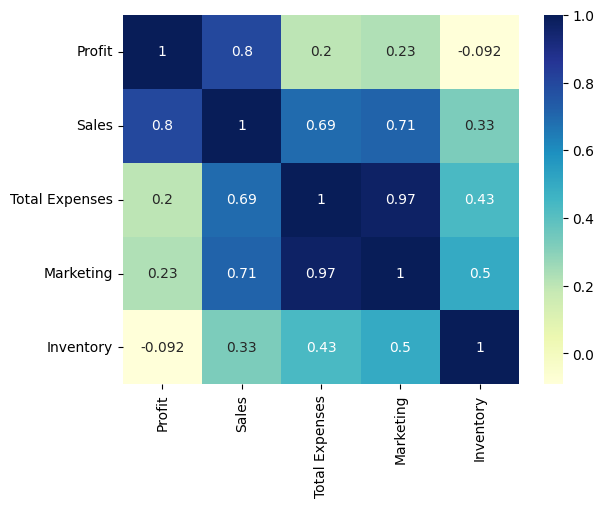

In [ ]:
sns.heatmap(df[['Profit','Sales','Total Expenses','Marketing','Inventory']].corr(),annot=True,cmap='YlGnBu')

Nhận xét biểu đồ: Biểu đồ trên thể hiện sự tương quan mối quan hệ giữa Profit, Sales, Total Expenses, Marketing, Inventory.
+ Qua biểu đồ trên ta nhận thấy được sự tương quan giữa các đối tượng:
+ Ví dụ: Giữa Profit và Sales ta thấy hệ số tương quan là 0.8 khá tích cực khi gần bằng 1 thể hiện được mối quan hệ mật thiết giữa 2 đối tượng là Profit và Sales. Trường hợp khác là Profit và Inventory hệ số tương quan là -0.092 ta nhận thấy được sự mâu thuẫn giữa 2 đổi tượng này một cái tăng một cái giảm dẫn tới hệ số tương quan có giá trị âm -> xét về mặt thực tế của bài toán hoàn toàn hợp lý tại vì tồn kho có giảm thì lợi nhuận mới tăng
- Kết luận: Heatmap thể hiện cho ta thấy được mối liên hệ giữa các đối tượng


Text(0.5, 1.0, 'Total Expenses vs Sales')

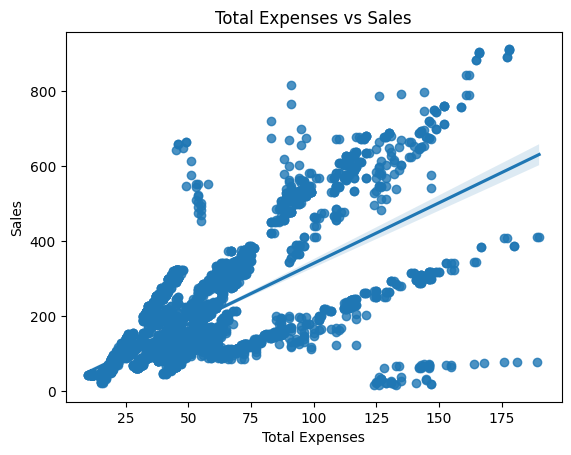

In [ ]:
sns.regplot(x=df['Total Expenses'],y=df['Sales'])
plt.title('Total Expenses vs Sales')

Biểu đồ trên là biểu đồ phân tán nhưng có sự xuất hiện của đường hồi quy mục đích để trực quan hóa mối quan hệ tuyến tính giữa chúng, nhận xét biểu đồ:
Trước tiên nhận xét biểu đồ ta cần biết vai trò của đường hồi quy trong biểu đồ là gì? (Đường hồi quy biểu đồ phân tán thường thể hiện mối quan hệ tuyến tính giữa hai biến giúp ta dự đoán giá trị của biến phụ thuộc dựa trên giá trị của biến độc lập)
+ Đường hồi quy: đường hồi quy có độ nghiêng dương -> mối quan hệ là tích cực (khi biến độc lập tăng, biến phụ thuộc cũng tăng) trường hợp này biến độc lập là Sales biến phụ thuộc là Total Expenses
+ Độ phân tán: Các điểm phân bố ở giá trị thấp cận gốc 0 thì phân bố đều xung quanh đường hồi quy -> sai số nhỏ và ở giấ trị lớn thì các giá trị phân bố cách xa đường hồi quy -> sai số lớn
+ Áp dụng vào bài toán ta rút ra được sản phẩm được bán ra ít đồng nghĩa với việc chi phí ít và ngược lại, còn một điều lưu ý nữa đó là ở các giá trị lớn thì sai số khá lớn -> cần điều chỉnh mô hình quản lý chi tiêu
- Kết luận: biểu đồ phân tán có đường hồi quy thể hiện được mối quan hệ tuyến tính, sự phân bố của các đối lượng dữ liệu -> đánh giá chất lượng mô hình, rút ra được sự thích hợp hay không thích hợp trong cách vận hành của các đối tượng
(Tương tự nhận xét các biểu đồ regplot phía dưới)

Text(0.5, 1.0, 'Marketing vs Profit')

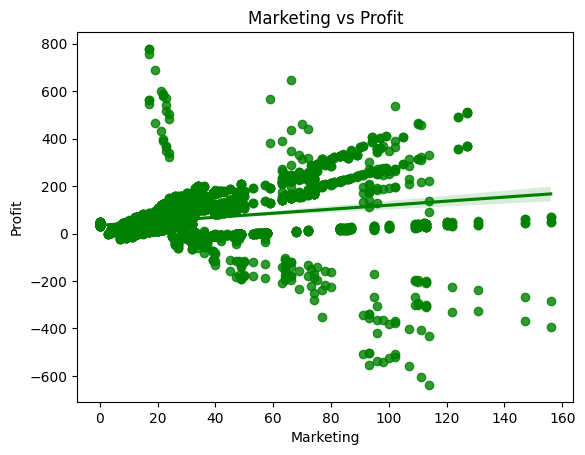

In [ ]:
sns.regplot(x=df['Marketing'],y=df['Profit'],color='g')
plt.title('Marketing vs Profit')

<Axes: xlabel='Inventory', ylabel='Sales'>

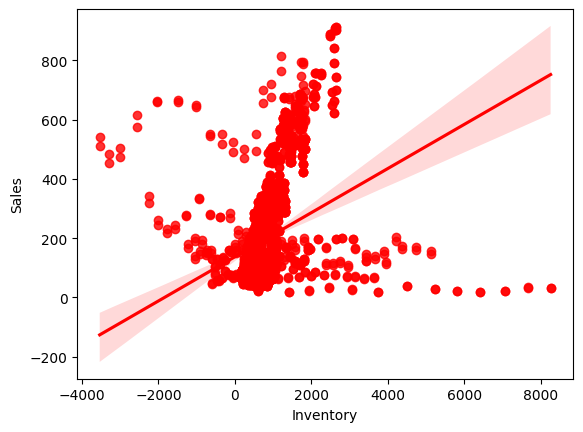

In [ ]:
sns.regplot(x=df['Inventory'],y=df['Sales'],color='r')

<Axes: xlabel='Sales', ylabel='Count'>

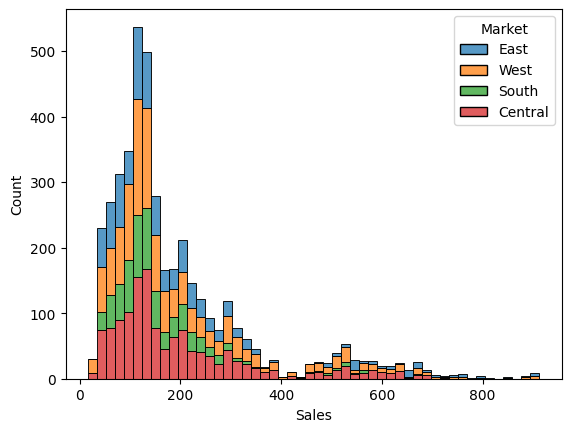

In [ ]:
sns.histplot(data=df,x='Sales',hue='Market',bins=50,multiple='stack')

Biểu đồ histogram: Biểu đồ thể hiện sự phân bố các cửa hàng ở các khu vực khác nhau và doanh du của từng vùng (East, West, South, Central)
Nhận xét biểu đồ:
+ Các cửa hàng phân bố chủ yếu ở vùng trung tâm, và doanh thu chính cũng nằm ở vùng trung tâm
+ Doanh nghiệp cũng đẩy mạnh xây dựng các cửa hàng ở vùng phía Đông và phía Tây, nhưng doanh thu còn chưa cao
+ Doanh thu trung bình của các cửa hàng khoảng 150-180
-> Doanh nghiệp đang trong giai đoạn phát triển với doanh thu nằm ở mức trung bình

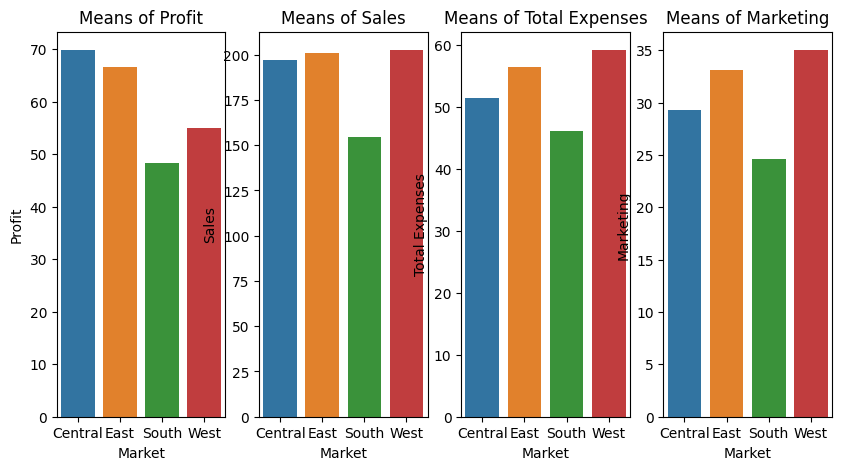

In [ ]:
cols=['Profit','Sales','Total Expenses','Marketing']
k=1
plt.figure(figsize=(10,5))
for i in cols:
    plt.subplot(1,4,k)
    sns.barplot(data=pd.DataFrame(df.groupby('Market')[i].mean()).reset_index(),x='Market',y=i)
    plt.title(f'Means of {i}')
    k+=1


# plt.subplot(1,2,1)
# sns.barplot(data=pd.DataFrame(df.groupby('Market').Profit.mean()).reset_index(),x='Market',y='Profit')
# plt.title('Mean of Profit')
# plt.subplot(1,2,2)
# sns.barplot(data=pd.DataFrame(df.groupby('Market').Sales.mean()).reset_index(),x='Market',y='Sales',)
# plt.title('Mean of Sales')

<Axes: xlabel='Profit', ylabel='Count'>

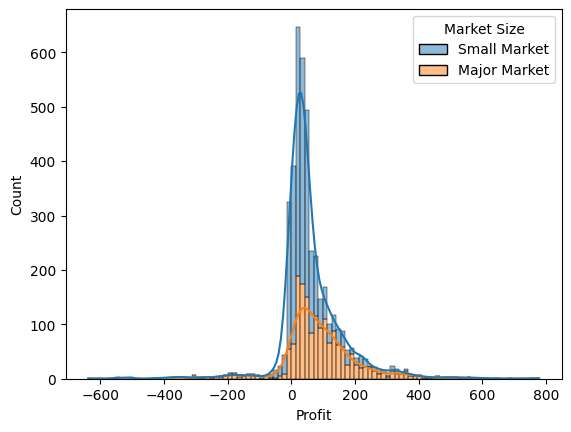

In [ ]:
sns.histplot(data=df,x='Profit',hue='Market Size',bins=100,kde=True,multiple='stack')

Biểu đồ histogram: Biểu đồ thể hiện sự phân bố các cửa hàng ở các khu vực khác nhau và lợi nhuận của cửa hàng (Small Market và Major Market)
Nhận xét biểu đồ:
+ Số lượng cửa hàng nhỏ chiếm phầm lớn
+ Lợi nhuận của các cửa hàng lớn ổn định hơn, lợi nhuận của các của hàng nhỏ tập trung chủ yếu khoảng 100
-> Doanh nghiệp đang có mức lợi nhuận khá tích cực tuy không nhiều nhưng doanh thu âm gần như là không có

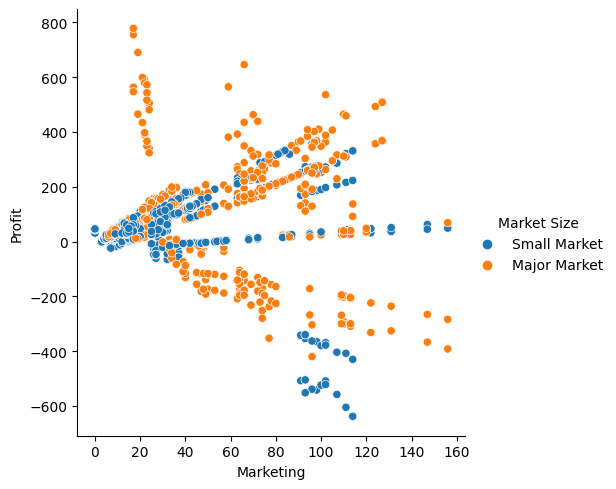

In [ ]:
sns.relplot(x=df['Marketing'],y=df['Profit'],hue='Market Size',data=df)

Biều đồ quan hệ (relational plots): biểu đồ giúp hiểu rõ mối quan hệ giữa Small Market và Major Market trong môi trường Profit và Marketing. Nhận xét biểu đồ:
+ Doanh nghiệp tập trung marketing cho các cửa hàng lớn nhưng hiểu quả chưa cao ta có thể nhận thấy được các cửa hàng lớn tuy được đẩy mạnh marketing nhưng lại không có lợi nhuận thậm chí là âm còn những cửa hàng lớn tuy kh đẩy mạnh chi phí cho marketing nhưng vẫn có doanh thu khá cao. Phải chăng đã làm marketing đúng??
+ Để trả lời cho câu hỏi trên ta sẽ nghĩ tới 2 trường hợp: tức là có thể là doanh nghiệp áp dụng marketing chưa tốt hoặc tại vì các cửa hàng có doanh thu thấp từ đầu nên mới cần đẩy mạnh chương trình marketing để tăng doanh thu. Với vai trò máy học ta chỉ đưa ra số liệu mà không thể biết được chiến lược nên ta suy nghĩ theo 2 cách trên

In [ ]:
df['Market Size'].value_counts()

Market Size
Small Market    2544
Major Market    1704
Name: count, dtype: int64

In [ ]:
market=df.groupby('Market Size')

 Tóm tắt thống kê của các đặc điểm chính của dữ liệu số về Major Maket và Small Market trong DataFrame

In [ ]:
market.Sales.describe()

,count,mean,std,min,25%,50%,75%,max
Market Size,,,,,,,,
Major Market,1704.0,249.495892,174.513272,41.0,125.0,199.0,301.0,912.0
Small Market,2544.0,155.137579,119.073993,17.0,85.0,122.0,171.0,716.0


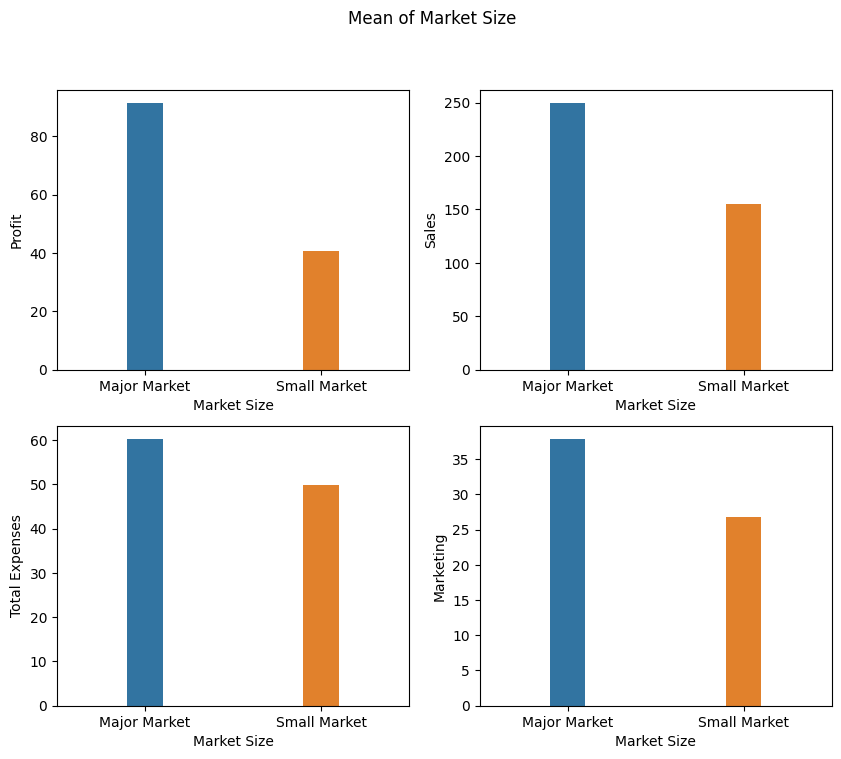

In [ ]:
cols=['Profit','Sales','Total Expenses','Marketing']
k=1
plt.figure(figsize=(10,8))
plt.suptitle("Mean of Market Size")
for i in cols:
    plt.subplot(2,2,k)
    sns.barplot(data=pd.DataFrame(df.groupby('Market Size')[i].mean()).reset_index(),
                             x='Market Size',y=i,width=0.2)


    k+=1

Biểu đồ cột trên so sánh Small Market và Major Market trong các môi trường khác nhau, biểu đồ đã thể hiện khá rõ điều đó nên không cần nhạn xét

In [ ]:
df.groupby(['Market Size','State']).agg({
    'Profit':'mean','Sales':'mean','Marketing':'mean','Total Expenses':'mean'
})

Profit       Sales  Marketing  Total Expenses
Market Size  State                                                           
Major Market California     110.364583  336.430556  55.770833       80.631944
             Colorado        67.208333  182.496212  25.795455       45.996212
             Florida         56.990741  173.347222  29.092593       50.967593
             Illinois       142.689815  323.532407  41.490741       63.208333
             Massachusetts  114.180556  208.090278  23.805556       46.979167
             New York       104.666667  369.020833  67.937500       91.859375
             Ohio            49.875000  159.800926  23.916667       47.458333
             Texas           93.845238  222.678571  28.250000       47.619048
Small Market Connecticut     45.363095  151.363095  24.880952       48.190476
             Iowa           102.833333  253.472222  35.157407       54.805556
             Louisiana       43.779762  137.863095  22.559524       42.750000
             Missouri        16.671296  114.106481  20.037037       44.634259
             Nevada          40.212121  227.875000  45.666667       70.401515
             New Hampshire   16.357143   88.613095  14.916667       39.321429
             New Mexico       4.755952   94.595238  18.107143       43.113095
             Oklahoma        50.940476  163.470238  29.666667       51.053571
             Oregon          47.117424  154.920455  22.825758       47.151515
             Utah            26.913194  122.861111  19.687500       43.086806
             Washington      47.520833  162.208333  30.183333       53.537500
             Wisconsin       40.287037  153.097222  30.333333       53.273148

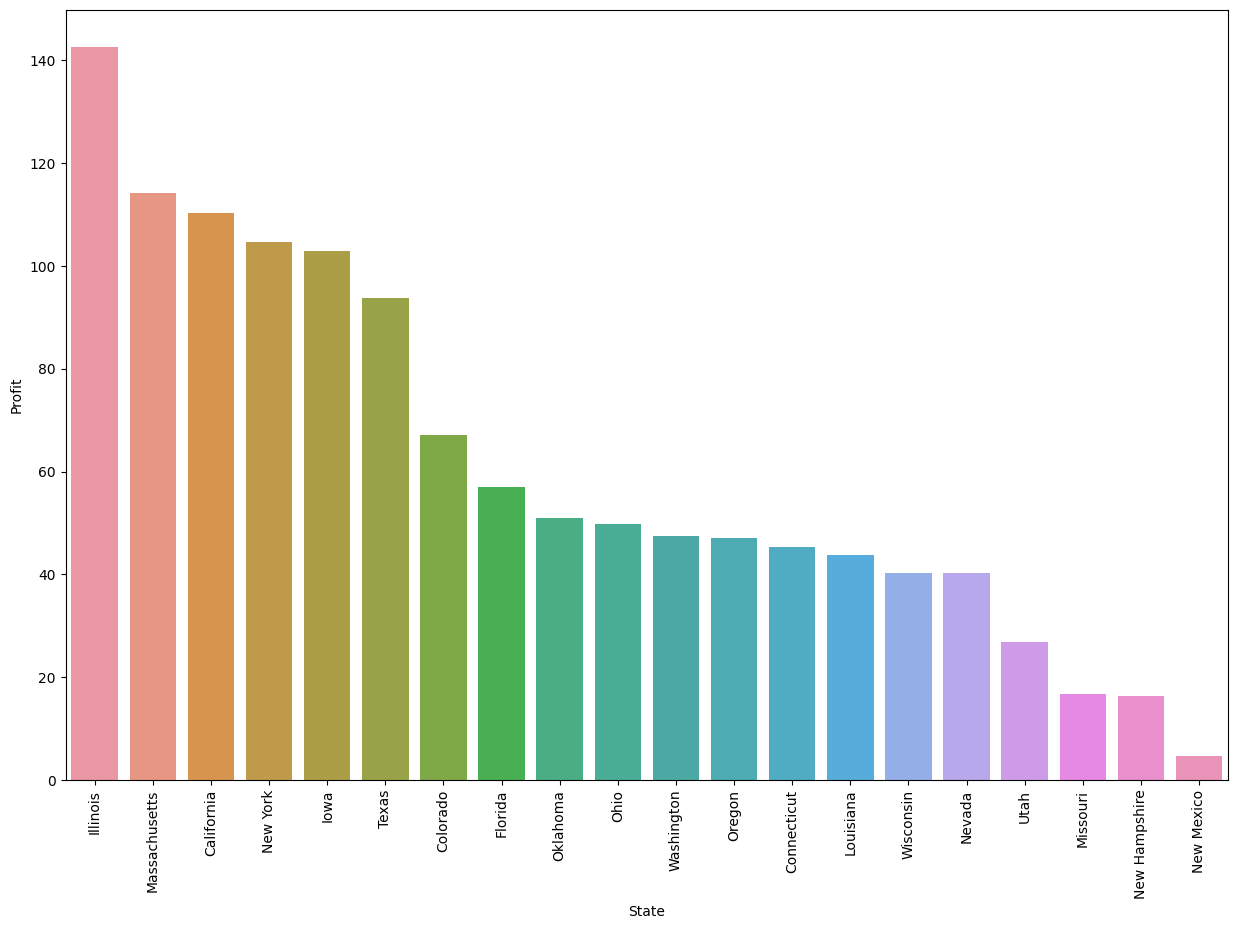

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data=pd.DataFrame(df.groupby(['State'])['Profit'].mean()).reset_index().sort_values('Profit',ascending=False),
                             x='State',y='Profit',)
plt.xticks(rotation=90)

plt.show()

  Biểu đồ cột thể hiện lợi nhuận theo từng tiểu bang mà doanh nghiệp đã xây dựng cửa hàng. Nhận xét biểu đồ:
  - Lợi nhuận của doanh nghiệp tập trung chủ yếu ở các tiểu ban lớn

In [ ]:
df[(df['State']=='Illinois') & (df['Profit']==df[df['State']=='Illinois'].Profit.max())]


,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
3195,773,Illinois,Central,Major Market,362.0,392.0,681.0,295.0,121.0,97.0,1714.0,340.0,340.0,470.0,810.0,5,08/01/11 00:00:00,Espresso,Caffe Mocha,Regular


In [ ]:
d=df.groupby(['State','Market','Market Size']).agg({
    'Profit':'mean','Sales':'mean','Marketing':'mean','Total Expenses':'mean'
}).reset_index()
d

,State,Market,Market Size,Profit,Sales,Marketing,Total Expenses
0,California,West,Major Market,110.364583,336.430556,55.770833,80.631944
1,Colorado,Central,Major Market,67.208333,182.496212,25.795455,45.996212
2,Connecticut,East,Small Market,45.363095,151.363095,24.880952,48.190476
3,Florida,East,Major Market,56.990741,173.347222,29.092593,50.967593
4,Illinois,Central,Major Market,142.689815,323.532407,41.490741,63.208333
5,Iowa,Central,Small Market,102.833333,253.472222,35.157407,54.805556
6,Louisiana,South,Small Market,43.779762,137.863095,22.559524,42.750000
7,Massachusetts,East,Major Market,114.180556,208.090278,23.805556,46.979167
8,Missouri,Central,Small Market,16.671296,114.106481,20.037037,44.634259
9,Nevada,West,Small Market,40.212121,227.875000,45.666667,70.401515


In [ ]:
df[df['Market']=='West']['Market Size'].value_counts()

Market Size
Small Market    1056
Major Market     288
Name: count, dtype: int64

In [ ]:
data=df.groupby(['Market Size','Product Type']).agg({'Profit':'mean','Sales':'mean'}).reset_index()


In [ ]:
data

,Market Size,Product Type,Profit,Sales,Margin
0,Major Market,Coffee,130.220588,313.718137,177.622549
1,Major Market,Espresso,99.099537,308.020833,162.194444
2,Major Market,Herbal Tea,63.651316,205.085526,104.381579
3,Major Market,Tea,75.416667,172.941176,99.637255
4,Small Market,Coffee,33.260802,137.084877,75.774691
5,Small Market,Espresso,34.689516,120.875000,68.688172
6,Small Market,Herbal Tea,57.048333,189.491667,104.003333
7,Small Market,Tea,40.246377,185.168478,89.931159


In [ ]:
def plotdata(data):
    k=1
    print('Major Market vs Small Market')
    plt.figure(figsize=(10,8))
    for i in data.columns[2:]:


        plt.subplot(1,2,k)

        sns.barplot(data=data[data['Market Size']=='Major Market'],x='Product Type',y=i,width=0.2)



        plt.title(i)

        k+=1


    k=1
    plt.figure(figsize=(10,8))

    for i in data.columns[2:]:

        plt.subplot(1,2,k)

        sns.barplot(data=data[data['Market Size']=='Small Market'],x='Product Type',y=i,width=0.2)
        plt.title(i)

        k+=1

    plt.show()


Major Market vs Small Market


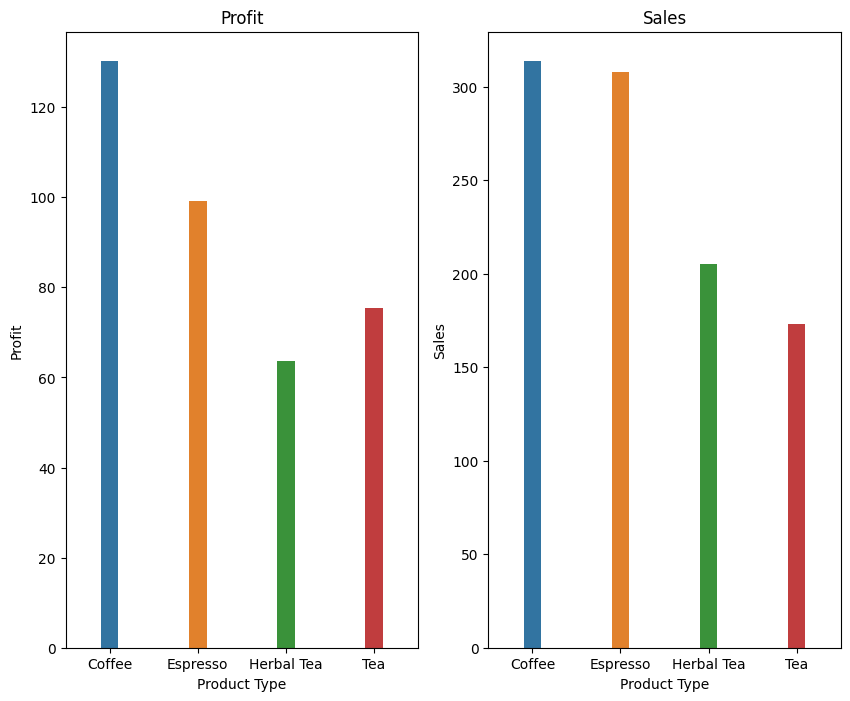

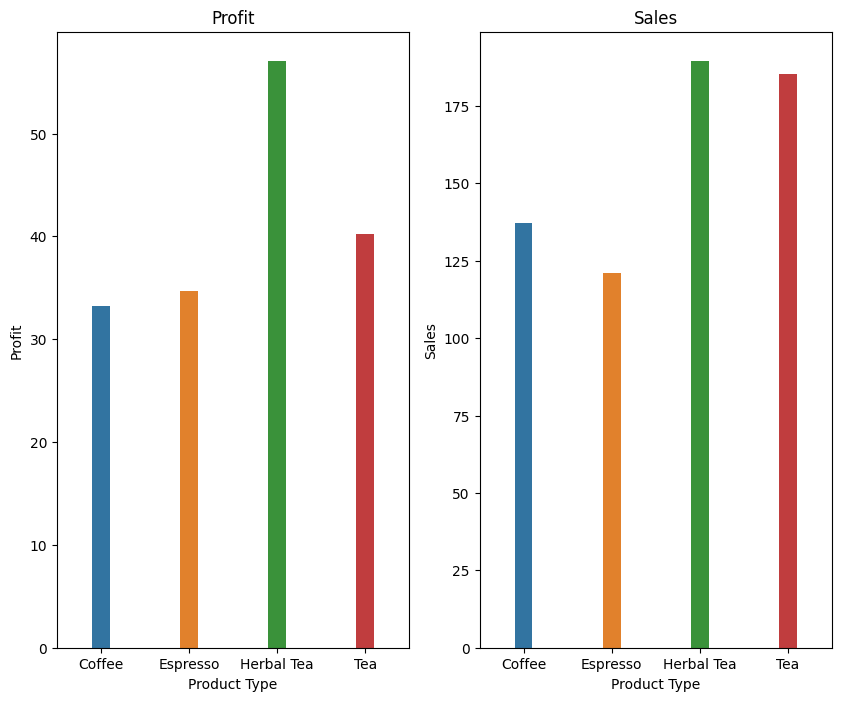

In [ ]:
plotdata(data)

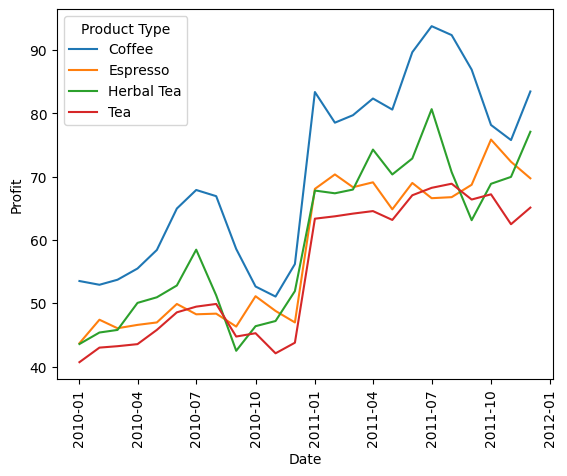

In [ ]:
sns.lineplot(data=pd.DataFrame(df.groupby(['Product Type','Date'])['Profit'].mean()).reset_index(),x='Date',y='Profit',hue='Product Type')
plt.xticks(rotation=90)
plt.show()

Biểu đồ trên biểu diễn giá trị các mặt hàng đem lại doanh thu cho doanh nghiệp theo từng mốc thời gian

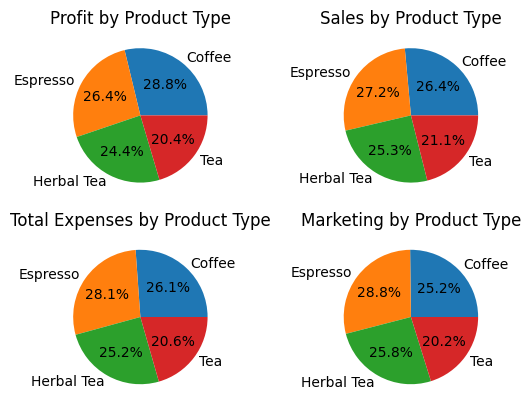

In [ ]:
cols=['Profit','Sales','Total Expenses','Marketing']
k=1
for i in cols:
    plt.subplot(2,2,k)
    product_profit = df.groupby('Product Type')[i].sum()

    product_profit.plot.pie(autopct='%1.1f%%')
    k+=1
    plt.title(f'{i} by Product Type')

    plt.ylabel('')

Biểu đồ tròn biểu diễn giá trị các mặt hàng theo từng môi trường


In [ ]:
df.Product.value_counts()

Product
Columbian            480
Caffe Mocha          480
Lemon                480
Decaf Espresso       408
Darjeeling           384
Decaf Irish Cream    384
Chamomile            384
Green Tea            288
Earl Grey            288
Caffe Latte          216
Mint                 192
Amaretto             192
Regular Espresso      72
Name: count, dtype: int64

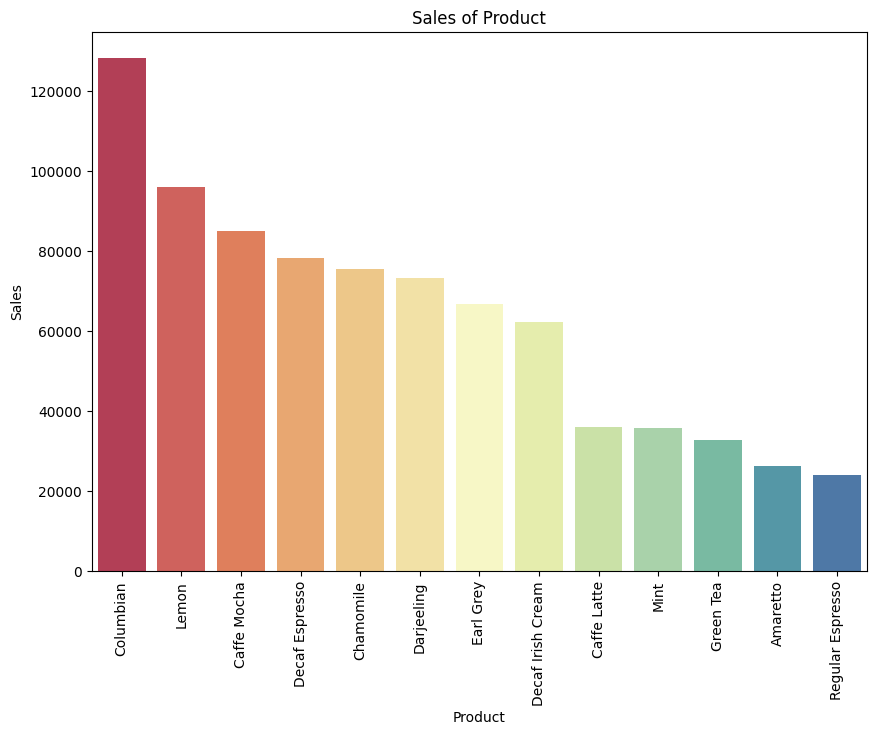

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(data=pd.DataFrame(df.groupby('Product')['Sales'].sum()).reset_index().sort_values('Sales',ascending=False),x='Product',y='Sales',palette='Spectral')
plt.xticks(rotation=90)
plt.title('Sales of Product')
plt.show()

In [ ]:
df[(df['Product']=='Columbian') & (df['Sales']==df[df['Product']=='Columbian']['Sales'].max())]


,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
2815,707,California,West,Major Market,370.0,548.0,912.0,364.0,178.0,127.0,2654.0,530.0,450.0,690.0,1140.0,2,07/01/10 00:00:00,Coffee,Columbian,Regular
3612,845,New York,East,Major Market,370.0,548.0,912.0,364.0,178.0,127.0,2654.0,370.0,340.0,520.0,860.0,2,07/01/10 00:00:00,Coffee,Columbian,Regular


In [ ]:
df[(df['Product']=='Regular Espresso') & (df['Sales']==df[df['Product']=='Regular Espresso']['Sales'].min())]

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
2387,603,New Hampshire,East,Small Market,-16.0,25.0,45.0,20.0,41.0,7.0,218.0,0.0,10.0,30.0,40.0,7,12/01/10 00:00:00,Espresso,Regular Espresso,Regular


# 3.Testing A/B


Trong thư viện SciPy, ttest_ind là một hàm được sử dụng để thực hiện kiểm định T-test giữa hai mẫu độc lập. Kiểm định T-test là một phương pháp thống kê được sử dụng để kiểm tra xem có sự khác biệt đáng kể giữa hai nhóm hay không, dựa trên giả định rằng các mẫu đến từ hai phân nhóm là độc lập.
Trong bài này chúng ta dùng kiểm định t-test để so sánh có sự khác biệt giữa Profit với Budget Profit và Sales với Budget Sales trong từng loại cửa hàng Major Market và Small Market.





In [ ]:
from scipy.stats import ttest_ind


In [ ]:
def test(df):
    print(f'Test in {df.iloc[0][0]}!')
    print('-----------------')
    for i in range(1,len(df.columns[1:]),2):

        stat,p_value=ttest_ind(df[df.columns[i]],df[df.columns[i+1]],alternative='less')
        if p_value<0.05:
            print(f'{df.columns[i]} is unexpected!'
                 )
        else:
            print(f'{df.columns[i]} is great!')

In [ ]:
df.columns

Index(['Area Code', 'State', 'Market', 'Market Size', 'Profit', 'Sales',
       'COGS', 'Total Expenses', 'Marketing', 'Inventory', 'Budget Profit',
       'Budget COGS', 'Budget Sales', 'ProductId', 'Date', 'Product Type',
       'Product', 'Type'],
      dtype='object')

Tạo dataframe test1 và test2 với các cột cần so sánh như đã nêu ở trên với:


*   Test1 kiểm định loại Major Market
*   Test2 kiểm định loại Small Market





In [ ]:
test1=df[df['Market Size']=='Major Market'][['Market Size','Profit','Budget Profit','Sales','Budget Sales',]]
test2=df[df['Market Size']=='Small Market'][['Market Size','Profit','Budget Profit','Sales','Budget Sales',]]

In [ ]:
test1

,Market Size,Profit,Budget Profit,Sales,Budget Sales
130,Major Market,-84.0,-80.0,106.0,130.0
131,Major Market,-138.0,-150.0,87.0,100.0
132,Major Market,-3.0,30.0,162.0,180.0
133,Major Market,-131.0,-90.0,109.0,120.0
134,Major Market,276.0,400.0,712.0,890.0
...,...,...,...,...,...
4213,Major Market,250.0,340.0,678.0,840.0
4214,Major Market,155.0,120.0,254.0,220.0
4215,Major Market,85.0,90.0,199.0,170.0
4216,Major Market,28.0,30.0,92.0,90.0


In [ ]:
def plottesting(test):

  plt.figure(figsize=(10,7))

  k=1
  for i in range(1,len(test.columns[1:]),2):
    plt.subplot(2,1,k)
    sns.lineplot(test[f'{test.columns[i]}'],color='r',label=test.columns[i])
    sns.lineplot(test[f'{test.columns[i+1]}'],color='g',label=test.columns[i+1])
    plt.title(f'{test.columns[i]} vs {test.columns[i+1]}  ({test.iloc[0][0]})')
    k+=1
  plt.show()



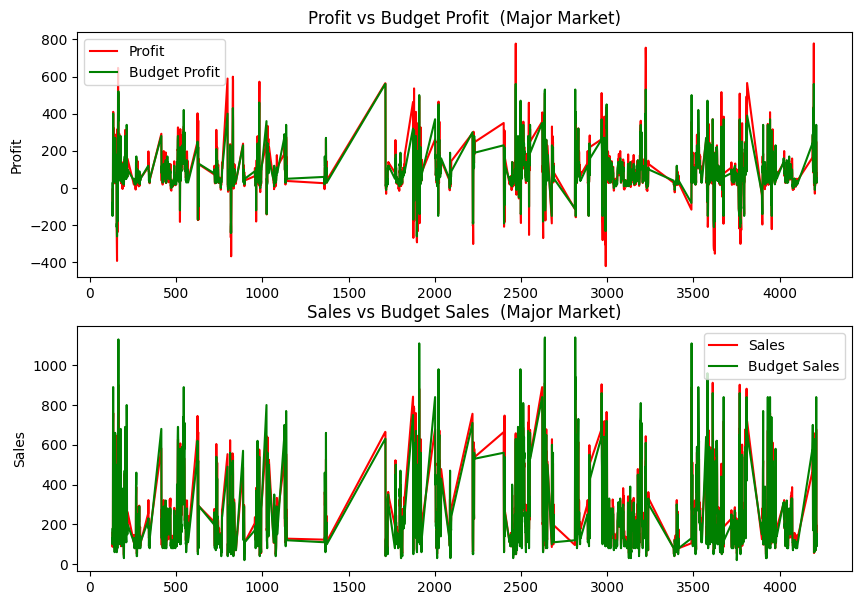

In [ ]:
plottesting(test1)

In [ ]:
test(test1)

Test in Major Market!
-----------------
Profit is great!
Sales is great!


In [ ]:
test2

,Market Size,Profit,Budget Profit,Sales,Budget Sales
0,Small Market,107.0,110.0,292.0,270.0
1,Small Market,75.0,90.0,225.0,210.0
2,Small Market,122.0,130.0,325.0,290.0
3,Small Market,105.0,110.0,289.0,260.0
4,Small Market,104.0,90.0,223.0,210.0
...,...,...,...,...,...
4243,Small Market,-6.0,0.0,113.0,90.0
4244,Small Market,-7.0,10.0,105.0,90.0
4245,Small Market,-3.0,0.0,131.0,100.0
4246,Small Market,1.0,0.0,160.0,120.0


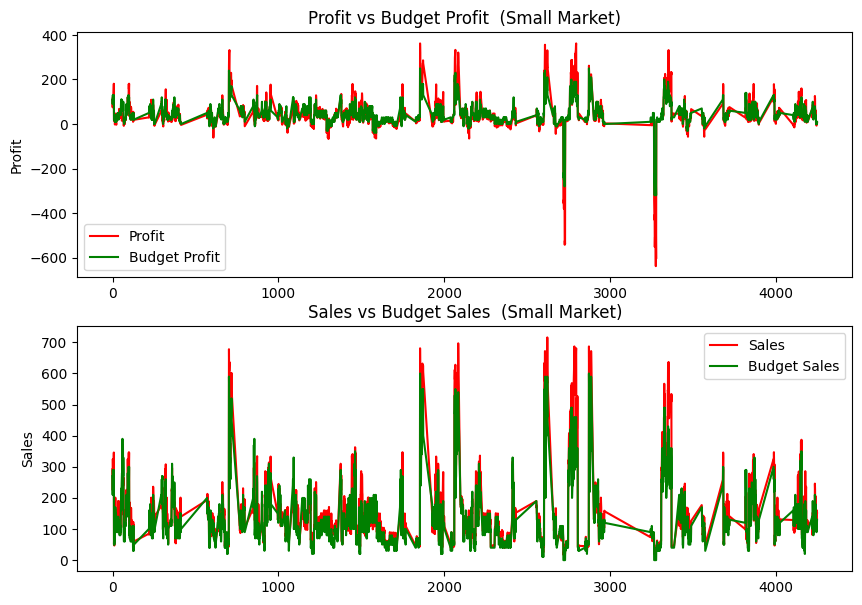

In [ ]:
plottesting(test2)

In [ ]:
test(test2)

Test in Small Market!
-----------------
Profit is great!
Sales is great!


Dựa vào biểu đồ và kết quả kiểm cho thấy kết quả dự kiến bán hàng ở hai loại cửa hàng là không có sự khác biệt nhiều, và kết quả dự kiến danh thu bán hàng luôn sát với kết quả thực tế, hầu như kết quả bán hàng thu được luôn cao hơn với mức dự kiến.

Còn về phần lợi nhuận thì ta thấy là dựa vào hình vẽ mặc dù đã dữ kiến được thua lỗ nhưng thực tế lỗ vẫn nhiều so với dự kiến, và khi lợi nhuận dương thì thực tế cao hơn dự kiên.

# 4.Predict Model

Scikit-learn là một thư viện về mô hình học máy có sẵn những mô hình như phân loại, hồi quy tuyến tính, phân cụm dữ liệu,...Đồng thời được thiết kế để tương tác với các thư viện khoa học và số Python NumPy và SciPy

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans

In [ ]:
df.columns

Index(['Area Code', 'State', 'Market', 'Market Size', 'Profit', 'Sales',
       'COGS', 'Total Expenses', 'Marketing', 'Inventory', 'Budget Profit',
       'Budget COGS', 'Budget Sales', 'ProductId', 'Date', 'Product Type',
       'Product', 'Type'],
      dtype='object')

Mô hình phân loại Market Size(Small Market vs Major Market)
* Sử dụng 3 mô hình :RandomForestClassifier, LogistisRegression, SVC
* Input: X=['Profit, 'Sales', 'COGS', 'Total Expenses', 'Marketing', 'Inventory', 'Budget Profit', 'Budget COGS',  'Budget Sales']
* Output y='Market Size'
      
      

In [ ]:
X=df[['Profit',
       'Sales', 'COGS', 'Total Expenses', 'Marketing', 'Inventory',
       'Budget Profit', 'Budget COGS',  'Budget Sales',]]
y=df['Market Size']


In [ ]:
X

,Profit,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Sales
0,107.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,270.0
1,75.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,210.0
2,122.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,290.0
3,105.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,260.0
4,104.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,210.0
...,...,...,...,...,...,...,...,...,...
4243,-6.0,113.0,47.0,72.0,42.0,-395.0,0.0,40.0,90.0
4244,-7.0,105.0,44.0,68.0,39.0,-508.0,10.0,30.0,90.0
4245,-3.0,131.0,55.0,79.0,49.0,-1053.0,0.0,40.0,100.0
4246,1.0,160.0,63.0,86.0,57.0,37.0,0.0,50.0,120.0


In [ ]:
y

0       Small Market
1       Small Market
2       Small Market
3       Small Market
4       Small Market
            ...     
4243    Small Market
4244    Small Market
4245    Small Market
4246    Small Market
4247    Small Market
Name: Market Size, Length: 4248, dtype: object

* Dùng StandardScaler() để tỉ lệ các dữ liệu X thành X_scale
* Dùng train_test_plit() để tạo ra tập huấn luyện và tập test

In [ ]:
X_scale=StandardScaler().fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_scale,y,random_state=42,test_size=0.33)


Test 3 model
* RandomForest
* Logistic
* SVC

In [ ]:
model={
    'RandomForest':[RandomForestClassifier(random_state=42,max_depth=10)],
    'Logistic':[LogisticRegression(random_state=42)],
    'SVC':[SVC(random_state=42)]
}

In [ ]:
model

{'RandomForest': [RandomForestClassifier(max_depth=10, random_state=42)],
 'Logistic': [LogisticRegression(random_state=42)],
 'SVC': [SVC(random_state=42)]}

* Lần lượt fit từng model với tập huấn luyện
* Đánh giá độ chính xác với tập tập test

In [ ]:
for x in model:
    model[x][0].fit(X_train,y_train)

    model[x].append(model[x][0].score(X_test,y_test))
    model[x].remove(model[x][0])






In [ ]:
pd.DataFrame(data=model,index=['Accuacy Score'])

,RandomForest,Logistic,SVC
Accuacy Score,0.873039,0.705421,0.762482


Mô hình sử dụng Neural NetWork
* tensorflow là một thư viện về học máy, học sâu được xây dựng bằng các lớp mạng lưới no-ron

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers



Biến đổi tập y
* Ánh xạ y=0 nếu là 'Small Market', ngược lại y=1

In [ ]:
y=y.apply(lambda x:0 if x=='Small Market' else 1)

Dùng train_test_plit() để tạo ra 3 tập gồm tập huán luyện, tập xác thưc, tập test

In [ ]:
X_scale=StandardScaler().fit_transform(X)
X_train_full,X_test,y_train_full,y_test=train_test_split(X_scale,y,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)

Mô hình Neural NetWork:
* Lớp 1:  gồm 128 neuron, với input đầu vào là mảng 1 chiều có số phần tử là số cột của X
* Lóp 2: có 64 neuron
* Lớp 3: có 32 neuron
* Lớp 4: có 1 neuron, lớp output


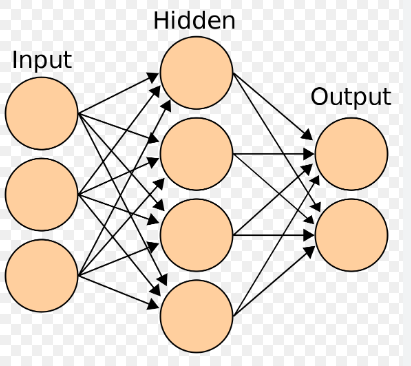

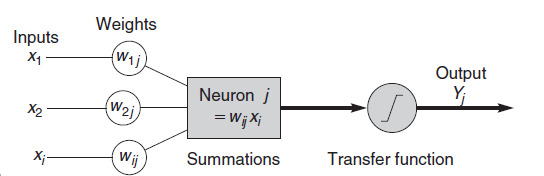

In [ ]:
md=keras.Sequential([
    layers.Dense(128,activation='relu',input_shape=[len(X.columns)]),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
#     layers.Dense(256,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])


Compile mô hình
* optimizer: tối ưu hoá mô hình thông qua việc học dữ liệu từ sai số của mô hình
* loss: sai số của mô hình
* metrics: theo dõi các bước huấn luyện, kiểm tra

Fit mô hình
* epochs: số vòng huấn luyện mô hình, mỗi vòng sẽ cải thiện mức độ sai số của mô hình
* validation_data : tập xác thực

In [ ]:
# md.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
md.compile(optimizer='adam',loss='binary_crossentropy',metrics=['binary_accuracy'])
md.fit(X_train,y_train,epochs=70,validation_data=(X_valid,y_valid))

Epoch 1/70
75/75 [==============================] - 3s 8ms/step - loss: 0.2270 - binary_accuracy: 0.8941 - val_loss: 0.2862 - val_binary_accuracy: 0.8733
Epoch 2/70
75/75 [==============================] - 0s 3ms/step - loss: 0.2202 - binary_accuracy: 0.8974 - val_loss: 0.3237 - val_binary_accuracy: 0.8570
Epoch 3/70
75/75 [==============================] - 0s 3ms/step - loss: 0.2114 - binary_accuracy: 0.9033 - val_loss: 0.3043 - val_binary_accuracy: 0.8657
Epoch 4/70
75/75 [==============================] - 0s 3ms/step - loss: 0.2127 - binary_accuracy: 0.9058 - val_loss: 0.3135 - val_binary_accuracy: 0.8507
Epoch 5/70
75/75 [==============================] - 0s 3ms/step - loss: 0.2108 - binary_accuracy: 0.9075 - val_loss: 0.2906 - val_binary_accuracy: 0.8770
Epoch 6/70
75/75 [==============================] - 0s 3ms/step - loss: 0.2140 - binary_accuracy: 0.8970 - val_loss: 0.2853 - val_binary_accuracy: 0.8695
Epoch 7/70
75/75 [==============================] - 0s 5ms/step - loss: 0.21

Đánh giá sai số của mô hình, độ chính xác mô hình

In [ ]:
md.evaluate(X_test,y_test)

34/34 [==============================] - 0s 2ms/step - loss: 0.2830 - binary_accuracy: 0.8823


[0.28296995162963867, 0.8822975754737854]

Dự đoán kết quả


In [ ]:
md.predict(X_test)

34/34 [==============================] - 0s 1ms/step


array([[0.01329058],
       [0.96594036],
       [1.        ],
       ...,
       [0.12007528],
       [0.9903211 ],
       [0.31178242]], dtype=float32)

In [ ]:
y_test

718     0
3116    1
3061    1
2552    1
120     0
       ..
331     0
342     1
1662    0
479     1
727     1
Name: Market Size, Length: 1062, dtype: int64